In [9]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Reliance_Stock.csv to Reliance_Stock.csv


In [3]:

#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [10]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('Reliance_Stock.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,449.142578,450.727539,437.403839,438.567810,422.947815,5005867.0
1,2015-06-09,437.626740,441.143402,434.555847,437.701019,422.111847,4224271.0
2,2015-06-10,438.840240,450.678009,438.344940,448.647278,432.668243,6234576.0
3,2015-06-11,448.746338,450.479889,432.723206,434.456787,418.983185,6773174.0
4,2015-06-12,435.373108,442.158783,435.001617,440.747162,425.049561,9942471.0


In [11]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,2020-06-01,1480.0,1538.349976,1475.949951,1520.349976,1509.805786,18434012.0
1225,2020-06-02,1526.0,1540.000000,1520.800049,1535.699951,1525.049194,10224049.0
1226,2020-06-03,1545.0,1560.000000,1533.349976,1541.650024,1530.958008,11713461.0
1227,2020-06-04,1544.0,1589.500000,1541.000000,1579.800049,1568.843506,15784379.0
1228,2020-06-05,1595.0,1618.000000,1573.699951,1581.699951,1570.730225,15264885.0


In [12]:

df_close = df['Close']

In [13]:

df_close.shape

(1228,)

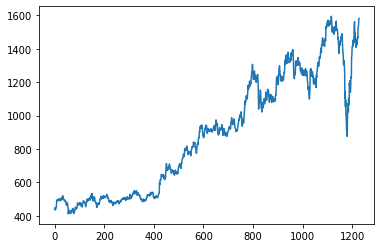

In [14]:
plt.plot(df_close)

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [16]:
df_close.shape

(1228, 1)

In [17]:



df_close

array([[0.02338568],
       [0.02265356],
       [0.03189909],
       ...,
       [0.95508044],
       [0.98730304],
       [0.98890775]])

In [18]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [21]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [23]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [24]:

#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 13s 437ms/step - loss: 0.0498 - val_loss: 0.0223
Epoch 2/100
13/13 [==============================] - 5s 375ms/step - loss: 0.0085 - val_loss: 0.0102
Epoch 3/100
13/13 [==============================] - 5s 383ms/step - loss: 0.0029 - val_loss: 0.0090
Epoch 4/100
13/13 [==============================] - 5s 379ms/step - loss: 0.0013 - val_loss: 0.0089
Epoch 5/100
13/13 [==============================] - 5s 384ms/step - loss: 0.0011 - val_loss: 0.0086
Epoch 6/100
13/13 [==============================] - 6s 443ms/step - loss: 9.8411e-04 - val_loss: 0.0083
Epoch 7/100
13/13 [==============================] - 6s 454ms/step - loss: 9.2820e-04 - val_loss: 0.0082
Epoch 8/100
13/13 [==============================] - 5s 393ms/step - loss: 9.4517e-04 - val_loss: 0.0080
Epoch 9/100
13/13 [==============================] - 5s 378ms/step - loss: 8.8548e-04 - val_loss: 0.0081
Epoch 10/100
13/13 [==============================] - 5s 377ms/step - loss

In [27]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

In [ ]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Predict next 30 day's stock price

In [ ]:

len(test_data), x_test.shape

In [ ]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:

df3 = df_close.tolist()
df3.extend(lst_output)

In [ ]:
len(df_close)

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df_close[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))